In [16]:
import pandas as pd
import re
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [17]:
DOG_RATES_PATH = "dog_rates_tweets.csv"

In [18]:
df = pd.read_csv(DOG_RATES_PATH, names=['id', 'created_at', 'text'], parse_dates=['created_at'])

In [19]:
def extract_rate(text):
    pattern = r'(\d+(\.\d+)?)/10'
    match = re.search(pattern, text)
    if not match:
        return None
    return float(match.group(1))

In [20]:
def to_timestamp(str):
    return pd.Timestamp(str).timestamp()
def to_datetime(str):
    return pd.Timestamp(str).to_pydatetime()

In [21]:
rates = df.apply(lambda x: extract_rate(x['text']), axis=1)
df['rates'] = rates
df = df[df.rates.ge(0) & df.rates.le(25) & df.rates.notnull()]

In [22]:
df['timestamp'] = df.apply(lambda x: to_timestamp(x['created_at']), axis=1)
df['created_at'] = df.apply(lambda x: to_datetime(x['created_at']), axis=1)

In [23]:
fit = stats.linregress(df['timestamp'], df['rates'])
df['prediction'] = df['timestamp']*fit.slope + fit.intercept
df

,id,created_at,text,rates,timestamp,prediction
3,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
8,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
9,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609
25,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
31,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
...,...,...,...,...,...,...
7364,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338
7370,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856
7382,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710
7432,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540


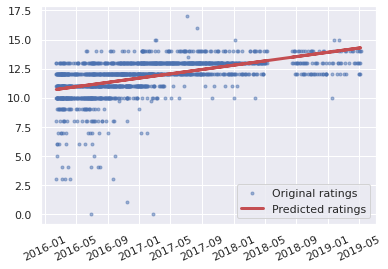

In [24]:
plt.xticks(rotation=25)

plt.plot(df['created_at'],df['rates'], 'b.', alpha=0.5)
plt.plot(df['created_at'], df['prediction'], 'r-', linewidth=3)
plt.legend(["Original ratings", "Predicted ratings"])
plt.savefig("dog-rates.png")
plt.show()